<a href="https://colab.research.google.com/github/dedemasutti/data-science/blob/main/data_Science_Mercado_Financeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Projeto de Ciencia de Dados mercado financeiro

###Imports

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import seaborn as sns

### Coletando os dados

In [1]:

# Define as ações que você deseja analisar
acoes = ['PETR4.SA', 'ITUB4.SA', 'BBAS3.SA']

# Define o período de tempo desejado
inicio = '2010-01-01'
fim = '2022-12-31'

# Coleta os dados das ações
dados_acoes = yf.download(acoes, start=inicio, end=fim)



[*********************100%***********************]  3 of 3 completed


### Pré processamento

In [2]:

# Calcula os retornos diários das ações
retorno_diario = dados_acoes['Adj Close'].pct_change()

# Remove a primeira linha (NaN)
retorno_diario = retorno_diario.dropna()


### Análise exploratória com gráficos

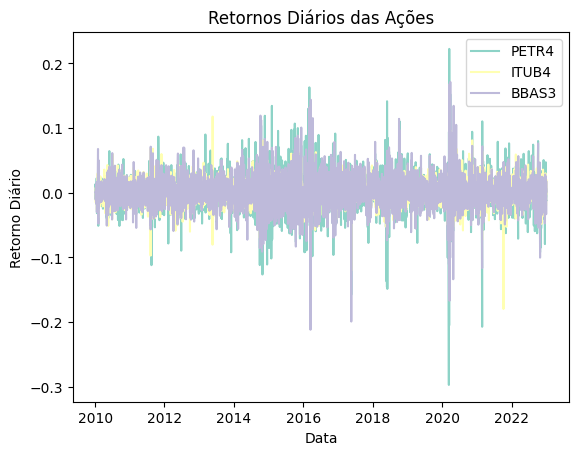

In [14]:


# Plota o gráfico de linha dos retornos diários
plt.plot(retorno_diario.index, retorno_diario['PETR4.SA'], label='PETR4')
plt.plot(retorno_diario.index, retorno_diario['ITUB4.SA'], label='ITUB4')
plt.plot(retorno_diario.index, retorno_diario['BBAS3.SA'], label='BBAS3')
plt.xlabel('Data')
plt.ylabel('Retorno Diário')
plt.title('Retornos Diários das Ações')
plt.legend()
plt.show()


<ipython-input-13-44bfb24de722>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=retorno_diario[['PETR4.SA', 'ITUB4.SA', 'BBAS3.SA']], ci=None)


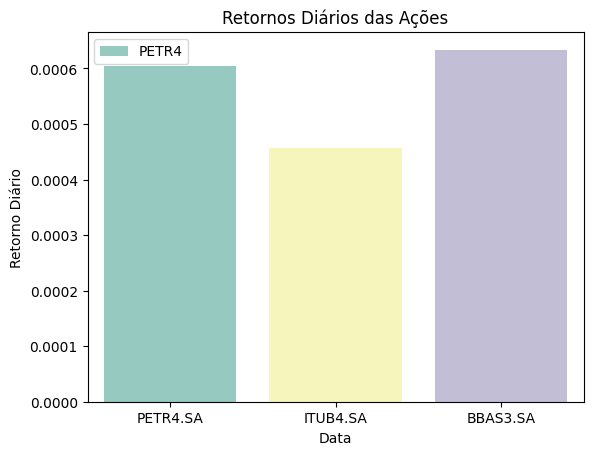

In [13]:

sns.set_palette("Set3")  # Define a paleta de cores

# Plota o gráfico de barras
sns.barplot(data=retorno_diario[['PETR4.SA', 'ITUB4.SA', 'BBAS3.SA']], ci=None)
plt.xlabel('Data')
plt.ylabel('Retorno Diário')
plt.title('Retornos Diários das Ações')
plt.legend(['PETR4', 'ITUB4', 'BBAS3'])
plt.show()


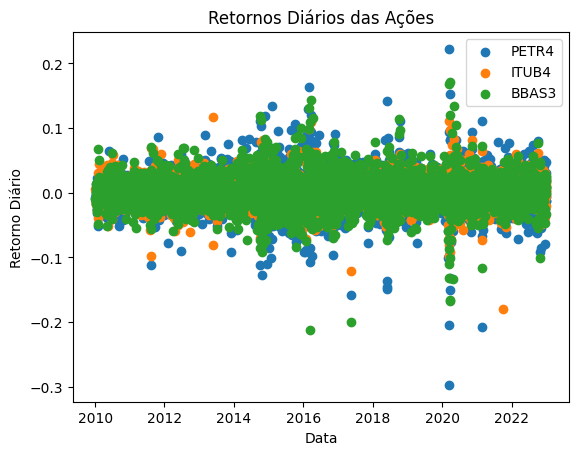

In [5]:
plt.scatter(retorno_diario.index, retorno_diario['PETR4.SA'], label='PETR4')
plt.scatter(retorno_diario.index, retorno_diario['ITUB4.SA'], label='ITUB4')
plt.scatter(retorno_diario.index, retorno_diario['BBAS3.SA'], label='BBAS3')
plt.xlabel('Data')
plt.ylabel('Retorno Diário')
plt.title('Retornos Diários das Ações')
plt.legend()
plt.show()


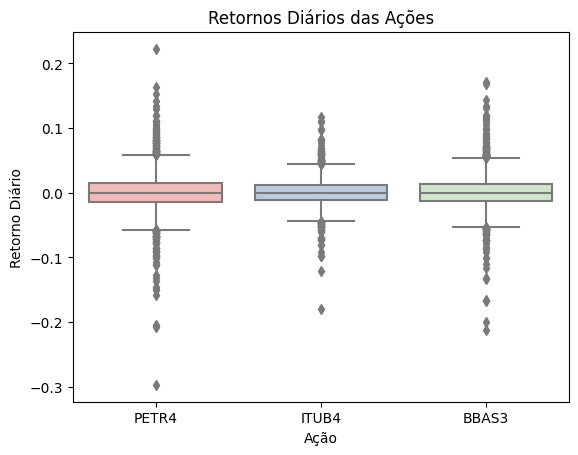

In [12]:


sns.set_palette("Pastel1")  # Define a paleta de cores

# Plota o gráfico de boxplot
sns.boxplot(data=retorno_diario[['PETR4.SA', 'ITUB4.SA', 'BBAS3.SA']])
plt.xlabel('Ação')
plt.ylabel('Retorno Diário')
plt.title('Retornos Diários das Ações')
plt.xticks(ticks=range(3), labels=['PETR4', 'ITUB4', 'BBAS3'])
plt.show()


### Modelagem e previsão

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


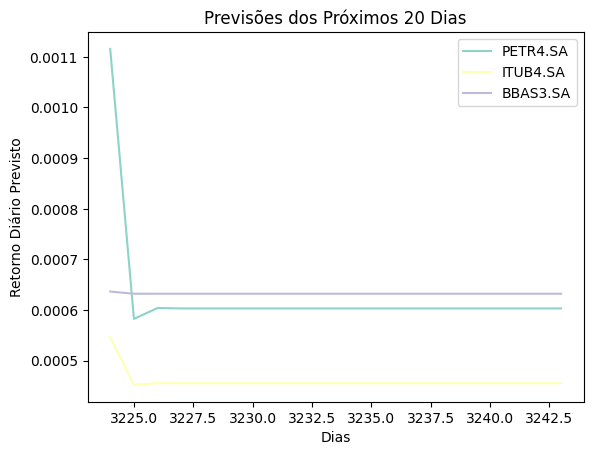

In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Ajusta um modelo ARIMA para cada ação
modelos = {}
ordem = (1, 0, 0)  # Ordem do modelo ARIMA

for acao in acoes:
    modelo = ARIMA(retorno_diario[acao], order=ordem)
    modelo_treinado = modelo.fit()
    modelos[acao] = modelo_treinado

# Faz a previsão dos próximos 10 dias para cada ação
dias_previsao = 20
previsoes = {}

for acao, modelo in modelos.items():
    previsao = modelo.get_forecast(steps=dias_previsao)
    previsoes[acao] = previsao.predicted_mean

# Plota as previsões
for acao, previsao in previsoes.items():
    plt.plot(range(len(retorno_diario.index), len(retorno_diario.index) + dias_previsao),
             previsao, label=acao)

plt.xlabel('Dias')
plt.ylabel('Retorno Diário Previsto')
plt.title('Previsões dos Próximos 20 Dias')
plt.legend()
plt.show()
